# Распознавание объектов на изображениях из набора данных CIFAR-10

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

In [ ]:
import numpy as np
from PIL import Image
from keras.optimizers import SGD
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
# Размер мини-выборки
batch_size = 128
# Количество классов изображений
nb_classes = 10
# Количество эпох для обучения
nb_epoch = 30
# Размер изображений
img_rows, img_cols = 32, 32
# Количество каналов в изображении: RGB
img_channels = 3
# Названия классов из набора данных CIFAR-10
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

## Подготовка данных

**Загружаем данные**

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

**Просмотр примеров данных**

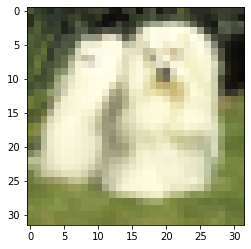

Номер класса: [5]
Тип объекта: собака


In [ ]:
n = 9547
plt.imshow(Image.fromarray(X_train[n]))
plt.show()
print("Номер класса:", y_train[n])
print("Тип объекта:", classes[y_train[n][0]])

**Нормализуем данные**

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

**Преобразуем правильные ответы в формат one hot encoding**

In [ ]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [ ]:
Y_train[n]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Создаем нейронную сеть

In [ ]:
# Создаем последовательную модель
model = Sequential()
# Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same',
                        input_shape=(32, 32, 3), activation='relu'))
# Второй сверточный слой
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))

# Третий сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# Четвертый сверточный слой
model.add(Conv2D(64, (3, 3), activation='relu'))
# Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))
# Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
# Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
# Слой регуляризации Dropout
model.add(Dropout(0.5))
# Выходной полносвязный слой
model.add(Dense(nb_classes, activation='softmax'))

**Печатаем информацию о сети**

In [ ]:
print(model.summary())

**Компилируем модель**

In [ ]:
sgd = SGD(lr=0.05, decay=1e-6, momentum=0.9, nesterov=True)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

## Обучаем нейронную сеть

In [ ]:
history = model.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=nb_epoch,
              validation_split=0.1,
              shuffle=True,
              verbose=2)

## Оцениваем качетсво обучения сети

In [ ]:
# Оцениваем качество обучения модели на тестовых данных
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

Точность работы на тестовых данных: 63.64%


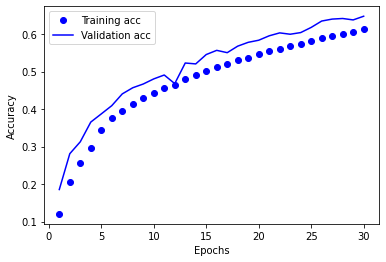

In [ ]:
history_dict = history.history
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']
epochs = range(1, len(accuracy_values) + 1)
plt.plot(epochs, accuracy_values, 'bo', label='Training acc')
plt.plot(epochs, val_accuracy_values, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Сохраняем обученную нейронную сеть

In [ ]:
model_json = model.to_json()
json_file = open("cifar10_model.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights("cifar10_model.h5")

In [ ]:
!ls

cifar10_model.h5  cifar10_model.json  sample_data


In [ ]:
from google.colab import files

In [ ]:
files.download("cifar10_model.json")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download("cifar10_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Применяем сеть для распознавания объектов на изображениях

**Просмотр изображения из набора данных для тестирования**

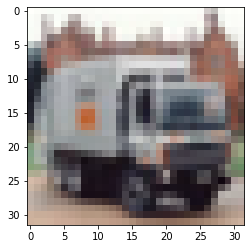

In [ ]:
index=11
plt.imshow(Image.fromarray((X_test[index] * 255).astype(np.uint8)))
plt.show()

**Преобразование тестового изображения**

In [ ]:
x = X_test[index]
x = np.expand_dims(x, axis=0)

**Запуск распознавания**

In [ ]:
prediction = model.predict(x)

**Печатаем результаты распознавания**

In [ ]:
print(prediction)

[[2.9078306e-04 3.0323509e-02 7.4211908e-05 2.4343639e-04 1.6519969e-05
  1.0389442e-04 1.4255663e-04 1.4437303e-04 3.6793432e-04 9.6829265e-01]]


**Преобразуем результаты из формата one hot encoding**

In [ ]:
prediction = np.argmax(prediction)
print(classes[prediction])

грузовик


**Печатаем правильный ответ**

In [ ]:
print(classes[y_test[index][0]])

грузовик


## Распознаем дополнительное изображение

In [ ]:
from google.colab import files

files.upload()

Проверяем загрузку файлов

In [ ]:
!ls

**Смотрим загруженную картинку**

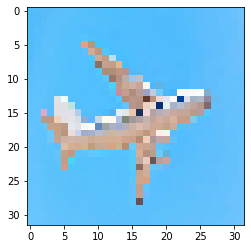

In [ ]:
img_path = 'plane.jpg'
img = image.load_img(img_path, target_size=(32, 32))
plt.imshow(img)
plt.show()

**Преобразуем картинку в массив для распознавания**

In [ ]:
x = image.img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)

**Запускаем распознавание**

In [ ]:
prediction = model.predict(x)
prediction = np.argmax(prediction)
print(classes[prediction])

самолет
